## Pandas의 시각화 기능

In [3]:
import numpy as np 
import pandas as pd

### plot() method

In [4]:
np.random.seed(2021)
df1 = pd.DataFrame(np.random.randn(100, 3),
                   index=pd.date_range('1/1/2021', periods=100),
                   columns=['A', 'B', 'C']).cumsum()
df1.tail()

,A,B,C
2021-04-06,19.553541,11.530579,-8.757243
2021-04-07,20.909591,10.466816,-10.143565
2021-04-08,22.435144,11.674278,-7.474442
2021-04-09,22.546156,10.547727,-7.594791
2021-04-10,21.319639,9.825032,-8.213817


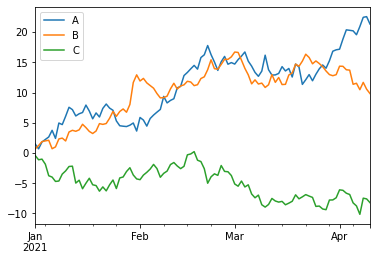

In [5]:
df1.plot();         # ;을 붙이면 위의 항목 타이틀이 안보여지게 됨. (한글이 안먹혀서;)

In [6]:
import matplotlib as mpl 
import matplotlib.pyplot as plt 
%matplotlib inline

mpl.rcParams['axes.unicode_minus'] = False   # minus 표시
mpl.rcParams["font.family"] = 'Malgun Gothic'

df1.plot()
plt.title("Pandas의 Plot메소드 사용 예")
plt.xlabel("시간")
plt.ylabel("Data")
plt.show()

### 다양한 플롯

In [7]:
import seaborn as sns

iris = sns.load_dataset("iris")    # 붓꽃 데이터
titanic = sns.load_dataset("titanic")    # 타이타닉호 데이터

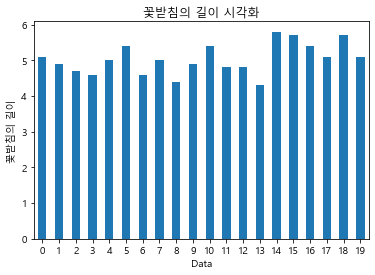

In [8]:
iris.sepal_length[:20].plot(kind='bar', rot=0)
plt.title("꽃받침의 길이 시각화")
plt.xlabel("Data")
plt.ylabel("꽃받침의 길이")
plt.show()

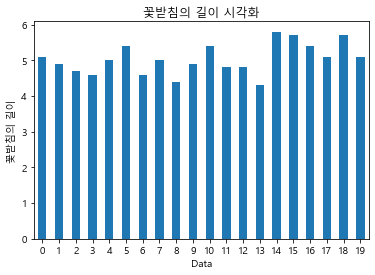

In [9]:
iris.sepal_length[:20].plot.bar(rot=0)    ## ==> 위와 같은 결과값이지만 이 처럼 쓸 수도 있다
plt.title("꽃받침의 길이 시각화")
plt.xlabel("Data")
plt.ylabel("꽃받침의 길이")
plt.show()

In [10]:
df2 = iris.groupby(iris.species).mean()     # floating을 위해 df2에 자료 묶기.
df2.columns.name = 'feature'        # columns의 name 선언
df2

feature,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


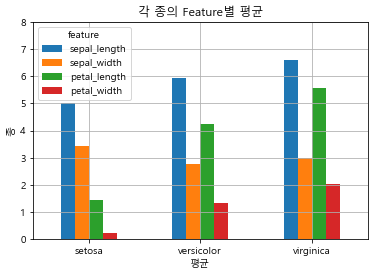

In [11]:
df2.plot.bar(rot=0)
plt.title("각 종의 Feature별 평균")
plt.xlabel("평균")
plt.ylabel("종")
plt.ylim(0, 8)
plt.grid()      ## 최근에는 이 줄을 추가해주어야 grid가 표시됨
plt.show()

In [12]:
df2.T         ## T는 전체 행렬, 결과: 각 feature 별로 품종 평균이 산출된다.

species,setosa,versicolor,virginica
feature,,,
sepal_length,5.006,5.936,6.588
sepal_width,3.428,2.770,2.974
petal_length,1.462,4.260,5.552
petal_width,0.246,1.326,2.026


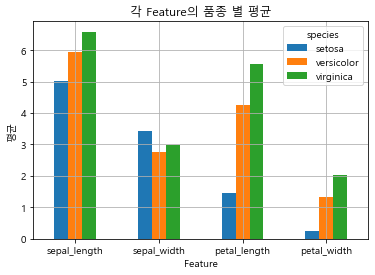

In [13]:
df2.T.plot.bar(rot=0)
plt.title("각 Feature의 품종 별 평균")
plt.xlabel("Feature")
plt.ylabel("평균")
plt.grid()
plt.show()

In [14]:
df3 = titanic['class'].value_counts()     
df3
# class가 keyword이기 때문에 class라고 치면 에러날 수 있어서 pclass쓰라고 써줌.
# * 시리즈의 값이 정수, 문자열, 카테고리 값인 경우에는 value_counts 메서드로 각각의 값이 나온 횟수를 셀 수 있다.

Third     491
First     216
Second    184
Name: class, dtype: int64

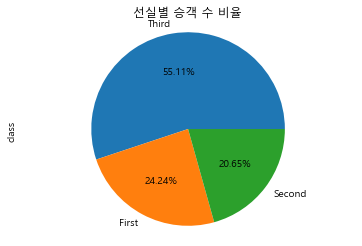

In [15]:
df3.plot.pie(autopct='%.2f%%')
plt.title("선실별 승객 수 비율")
plt.axis('equal')
plt.show()

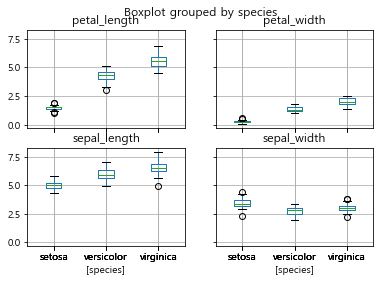

In [16]:
iris.boxplot(by='species')      
plt.tight_layout
plt.show()

# 품종별(species)로 boxplot을 줄 때,